<a href="https://colab.research.google.com/github/Daprosero/Deep-Convolutional-Generative-Adversarial-Network/blob/master/sistema_de_visi%C3%B3n_por_computador_basado_en_aprendizaje_profundo_para_la_detecci%C3%B3n_de_objetos_sobre_im%C3%A1genes_y_video_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#sistema de visión por computador basado en aprendizaje profundo para la detección de objetos sobre imágenes y video.


La deteección de obejtos es una técnica vinculada a la visión artificial y al procesamiento digital de imagenes que busca la extracción, representación y clasificación de cierto tipo de clases en imagenes y videos. La detección de objetos actualmente posee muchas aplicaciones dentro de las cuales se destacan el reconocimiento facial, recuperación de imagenes y seguimineto de objetos.\
El principio básico de la detección de objetos es buscar características propias de una clase, por ejemplo, en un circulo todos los puntos pose una misma distancia a su centro, en un cuadrado se buscan lados con el mismo tamaño y perpendiculares en sus esquinas.\
Para cumplir con el objetivo de Desarrollar un sistema  de visión por computador basado en aprendizaje profundo para la detección de objetos sobre imágenes y videoa partir de la codificación de patrones espacio temporales no estacionarios relevantes, se optó por la implementación de Deep Convolutional Generative Adversarial Networks o DCGAN.




#Generative Adversarial Networks (GAN)

Las GANs es una arquitectura de red neuronal capaz de convertir datos basuras(Ruido) en información relevante(conocimiento). Las GANs utiliza la naturaleza de los adversarios que consiste en implementar un modelo generativo para que compita con un modelo no generativo(Discriminador) para poder lograr objetivos idividuales. Se puede ver este enfrentamiento como el juego de policias y ladrones. los ladrones buscan falsificar dinero cada vez más párecido al real( generador) y los policias de detectar el dinero falso(discriminador).Este modelo llega a un punto en el que es indistinguible el dinero real del falso(50/50) y por ende se puede utilizar las GANs como generadora de datos o detección de datos falsos.\
La estructura general de las GANs es la siguiente:
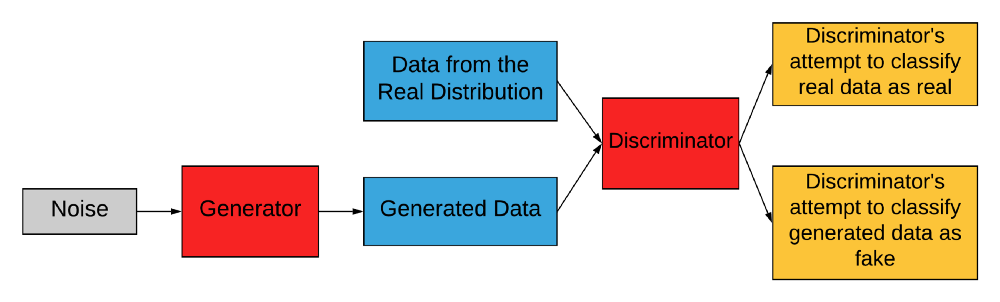
## Ruido
Es la distribución aleatoria que se busca transformar a una distribución deseada, es decir, Las GANs asignan una función estadistica de una distribución a otra.

## Datos de la distribución real
Es la distribución real o deseada, es el objetivo final de las GANs  a la hora de transformar el ruido. En el ejemplo del juego de policias y ladrones este es el conjunto de datos de dinero real con el cual se entrena el modelo.

## Discriminador
El proposito del discriminador es el de clasificar los datos como reales o falsas, en pocas palabras, el discriminador tiene las siguientes funciones.
* Clasificar correctamente los datos reales como reales.
* Clasificar correctamente los datos falsos como falsos.

Podemos ver el discriminador como una métrica de evaluación entrenable que nos indica la calidad del generador. 

## Generador
El generador por medio de una red generativa intenta buscar las tendencias de los datos reales y generar nuevos datos pertencientes a la distribución real. Debido a que este es el apartado principal de las GANs debe penalizarce fuertemente cada vez que los datos generados se encuentren lejos de los reales y más suavemente cuando estos datos nuevos se encuentren cerca de los reales. Se minimiza la penalización a medida que el generador engañe al discriminador.

## Entrenamiento
Por términos de convergencia el entrenamiento del generador y discrminador se deben hacer por separado. Se entrena el discriminador por varias epocas y después el generador, esta secuencia continua de un lado a otro hasta llegar al objetivo. Pero, lo que se quiere es realizar el proceso lo más óptimo posible, es por esto que por cada k pasos óptimos del discriminador se da un paso óptimo en el generador. 
## Función de costo
\begin{equation}
 _{G}^{Min}\rightleftharpoons_{D}^{Max}= E_{x\sim PData(x)}log(D(x))+E_{z\sim P_{z}(z)}log(1-D(G(z))) 
\end{equation}
En donde:
* D(x): Estiumación de los discriminadores de la probabilidad de que la instancia `x` de los datos.
* $E_{x}$: Valor esperado sobre todas las instancias de los datos reales.
* G(z): Salida del generador cuando se le da un ruido `z`
* D(G(z)): Estimación discriminadora de la probabilidad de que una instancia falsa(G(z)) sea real.
* $E_{z}$ valor esperadosobre todas las entradas aleatorias al generador,En efecto, es el valor esperado sobre todas las instansias falsas generadas G(z).


Esta perdida se conoce como la pérdida Minmax, en donde el generador busca minimizar y el discrimizar busca maximizar la función. En muchas ocaciones se puede modificar esta función para que ocurra lo contrario, es decir, el generador maximice la función y el discriminador la minimice. Esta última modificación se hace debido a que en las primera epocas el discriminador facilmente clasifica los datos reales de los falsos saturando la función de costo, como resultado se tendrá un modelo mas robusto al inicio del entrenamiento y mas flexible al final.

# Deep Convolutional Generative Adversarial Networks (DCGAN)
los DCGAN son la "versión" de las GANs para imagenes. Esta estructura utiliza principalmente las redes neuronales profundas para generar imagenes a partir del ruido, lo que quiere decir  que esta versión utiliza una red generadora para crear nuevos datos y una red discriminatoria para evaluar el rendimiento del generador. 

## Generador
El generador se basa principalmente en capas convolucionales transpuestas que da como resultado el proceso inverso de las capas convolucionales. Esta sección se encargada de desconvolucioanr el ruido y llevarlo a la distribución deseada. Un ejemplo de este proceso es aplicar un kernel 3x3 sobre una imagen 2x2 con bordes de cero 2x2 (imagen 6x6) y extraer una imagen 4x4

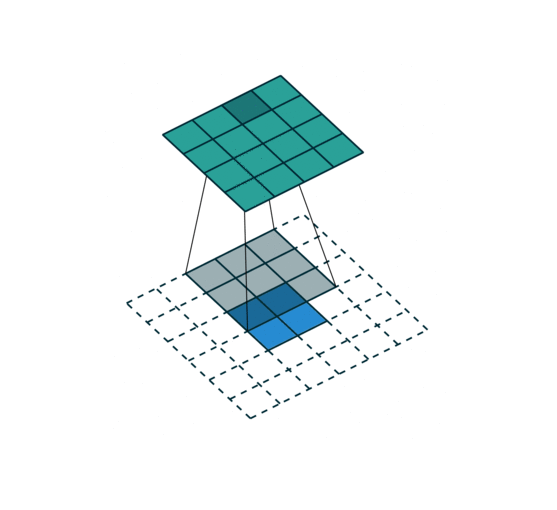

## Discriminador 
El discriminador es simplemente un clasificador binario compuesto por capas convolucionales. La salida de estas capas convolucionales es una salida con la probabilidad de que la imagen sea real o falsa.

## Perdida
Definiremos la perdida como la penalización debido a la equivocación en el funcionamiento de alguno de los dos modelos. En el caso del generador la penalización ocurre cuando el discriminador clasifica las imagenes generadas como falsas. De forma contraria el discriminador debe predecir las salidas y clasificarlas de manera correcta, lo que se traduce en clasificar las imagenes falsas como falsas y las reales como reales, de lo contrario este modelo será penalizado.


#Implementación

Para poder realizar la implemntación de una DCGAN se buscaron las bases de datos más utilizadas en Machine Learning para probar y comparar los resultados de investigaciónes debido a su amplia literatura. Estos conjuntos de datos son MNIST y CIFAR-10.

En la seguiente sección se realizará un ejemplo detallado utilizando la bas de datos MNIST, esto con el objetivo de explicar y afianzar los conociminetos observados en la sección anteriror.
De manera similar se creará un modelo para la utlización de la base de datos CIFAR-10 con su respectiva explicación a las modificaciones relizadas a la estructura del modelo anterior

## MNIST
La MNIST (Modified National Institute of Standards and Technology database) es una base de datos de diígitos escrits a mano. Esta base de datos consta de 60.000 muetras para entrenamiento y 10.000 para evaluación

En la siguiente celda se  importarán e instalará todas las librerias requeridas en el documento.

In [1]:
from numpy import expand_dims
from numpy import zeros
from numpy import ones
from numpy import vstack
from numpy.random import randn
from numpy.random import randint
import tensorflow as tf
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Reshape
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from keras.layers import Dropout
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import time
from IPython import display
from matplotlib import pyplot
from keras.layers import Activation, BatchNormalization, Concatenate, Dense,Embedding, Flatten, Input, Multiply, Reshape,AveragePooling2D,Dropout
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.convolutional import Conv2D, Conv2DTranspose
from keras.models import Model, Sequential

A continuación se carga la base de datos, se expande las dimensiones de la misma, se normaliza para que los valores se encuentren entre $[1 ,-1]$.

 Además, se establece las variables para el entrenamiento y una semilla `seed` para mirar el progreso de la generación de datos.

In [ ]:
(train, _), (_, _) = tf.keras.datasets.mnist.load_data()
train = train.reshape(train.shape[0], 28, 28, 1)
X=train.astype('float32')
dataset=(X-127.5)/127.5
noise_dim=100
in_shape=(28,28,1)
Num_Example=25
seed=tf.random.normal([Num_Example, noise_dim]) 
n_epochs=100
n_batch=64

11493376/11490434 [==============================] - 0s 0us/step


Esta función se encarga de entregar un número de muetras aleatorias provenientes de la base de datos y un arreglo de unos correspondietes a su clasificación(Datos reales).

In [ ]:
def generate_real_samples(dataset, n_samples):
	ix = randint(0, dataset.shape[0], n_samples)
	X = dataset[ix]
	y = ones((n_samples, 1))
	return X, y

Esta sección nos entrega un número aleatorio de datos falsos poroducidos por el generador y un arreglo de ceros correspondiente a su clasificación(Datos falsos)

In [ ]:
def generate_fake_samples(g_model, latent_dim, n_samples):
	x_input = generate_latent_points(latent_dim, n_samples)
	X = g_model.predict(x_input)
	y = zeros((n_samples, 1))
	return X, y

En esta apartado se genera el ruido necesario para la generación de imagenes. Este ruido posee el tamaño de (n_samples,noise_dim).

In [ ]:
def generate_latent_points(latent_dim, n_samples):
	x_input = randn(latent_dim * n_samples)
	x_input = x_input.reshape(n_samples, latent_dim)
	return x_input

### Generador
Esta red es la encargada de recibir un ruido aleatorio y convertirlo en una imagen de 28x28x1, para cumplir este objetivo se optó por utilizar la siguiente estructura:

In [ ]:
def define_generator():
	model = Sequential()
	n_nodes = 512 * 7 * 7
	model.add(Dense(n_nodes, input_dim=noise_dim))
	model.add(LeakyReLU(alpha=0.2))
	model.add(Reshape((7, 7, 512)))
	model.add(Conv2DTranspose(256, (4,4), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	model.add(Conv2DTranspose(256, (4,4), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	model.add(Conv2D(1, (7,7), activation='tanh', padding='same'))
	return model
g_model=define_generator()
g_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 25088)             2533888   
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 25088)             0         
_________________________________________________________________
reshape (Reshape)            (None, 7, 7, 512)         0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 14, 14, 256)       2097408   
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 14, 14, 256)       0         
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 28, 28, 256)       1048832   
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 28, 28, 256)       0

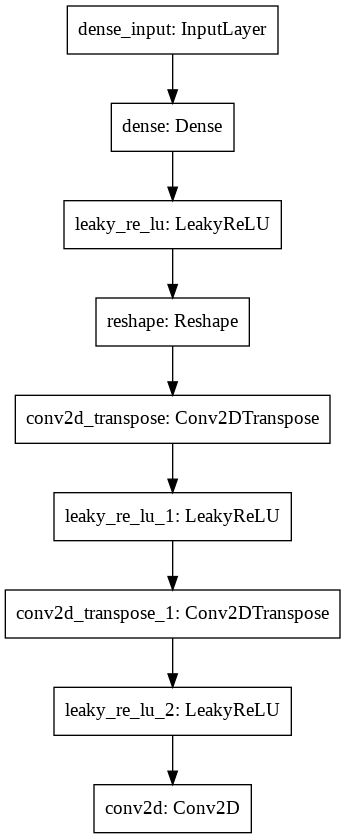

In [ ]:
tf.keras.utils.plot_model(g_model)

### Discriminador
Esta red recibe una imagen de (28,28,1) y devuelve como salida un valor correspondiente a su clasificación, es decir, esta red nos dice si la imagen de entrada es falsa o real. La arquitectura y el modelo se observan a continuación 

In [ ]:
def define_discriminator():
	model = Sequential()
	model.add(Conv2D(64, (4,4),strides=(2,2), padding='same', input_shape=in_shape))
	model.add(LeakyReLU(alpha=0.2))
	model.add(Conv2D(256, (4,4), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	model.add(Conv2D(512, (4,4), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	model.add(Flatten())
	model.add(Dropout(0.4))
	model.add(Dense(1, activation='sigmoid'))
	opt = Adam(lr=0.0002, beta_1=0.5)
	model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
	return model
d_model=define_discriminator()
d_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 14, 14, 64)        1088      
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 256)         262400    
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 7, 7, 256)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 512)         2097664   
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 4, 4, 512)         0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)             

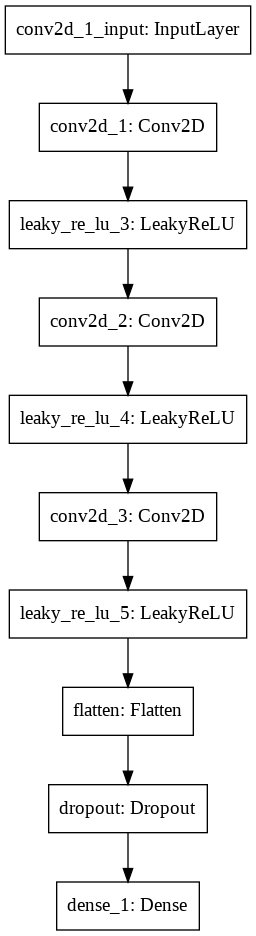

In [ ]:
tf.keras.utils.plot_model(d_model)

### GAN
La función `def define_gan()` se encarga de combinar al discriminador y al generador. Este modelo utiliza las dos redes anteriores pero solo entrea al generador, esto pues, el discriminador se entrena por separado. La arquitectura de este modelo de observa acontinuación.



In [ ]:
def define_gan():
	d_model.trainable = False
	model = Sequential()
	model.add(g_model)
	model.add(d_model)
	opt = Adam(lr=0.0002, beta_1=0.5)
	model.compile(loss='binary_crossentropy', optimizer=opt,metrics=['accuracy'])
	return model
gan_model=define_gan()
gan_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 28, 28, 1)         5692673   
_________________________________________________________________
sequential_1 (Sequential)    (None, 1)                 2369345   
Total params: 8,062,018
Trainable params: 5,692,673
Non-trainable params: 2,369,345
_________________________________________________________________


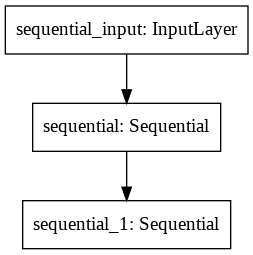

In [ ]:
tf.keras.utils.plot_model(gan_model)

### Función de entrenamiento
A continuación se define la función encargada del entrenamiento.

En esta función se entrena al discrimiandor en dos partes, una con imagenes falsas y otra con imagenes reales. El tamaño de las muestras  en cada caso es de `half_batch` el cual corresponde a la mitad del lote total.  

Finalmente la función entrena al modelo GAN con todo el lote `n_batch` y con la semilla generada al inicio se muestra el avance y el rendimiento de todo el modelo.

In [ ]:
def train():
    bat_per_epo = int(dataset.shape[0] / n_batch)
    half_batch = int(n_batch / 2)
    Loss_R=[]
    Loss_F=[]
    Acc=[]
    gen_lossA=[]  
    for C in range(n_epochs): 
        start=time.time()
        for D in range(bat_per_epo):
            X_real, y_real = generate_real_samples(dataset, half_batch)
            d_loss1, _ = d_model.train_on_batch(X_real, y_real)
            X_fake, y_fake = generate_fake_samples(g_model, noise_dim, half_batch)
            d_loss2, _ = d_model.train_on_batch(X_fake, y_fake)
            X_gan = generate_latent_points(noise_dim, n_batch)
            y_gan = ones((n_batch, 1))
            g_loss,acc = gan_model.train_on_batch(X_gan, y_gan)
        display.clear_output(wait=True)
        print ('Epoca {}/{} tiempo total:{}'.format(C + 1,n_epochs, time.time()-start))  
        gen_imgs=g_model.predict(seed)
        gen_imgs = gen_imgs*0.5+0.5
        fig, axs = plt.subplots(5, 5)
        cnt = 0
        for i in range(5):
            for j in range(5):
                axs[i,j].imshow(gen_imgs[cnt, :,:,0], cmap='gray')
                axs[i,j].axis('off')
                cnt += 1
        plt.show()
        gen_lossA.append(g_loss)
        Loss_R.append(d_loss1)
        Loss_F.append(d_loss2)
        Acc.append(acc)
        plt.plot(np.array(range(1,np.array(gen_lossA).shape[0]+1)),gen_lossA,'r',np.array(range(1,np.array(Loss_R).shape[0]+1)),Loss_R,'k',
                 np.array(range(1,np.array(Loss_F).shape[0]+1)),Loss_F,'b',np.array(range(1,np.array(Acc).shape[0]+1)),Acc,'g')
        plt.legend(['Gan_loss','Dis_lossR','Dis_LossF','Gan_acc'])
        plt.show()

Epoca 100/100 tiempo total:72.52328896522522


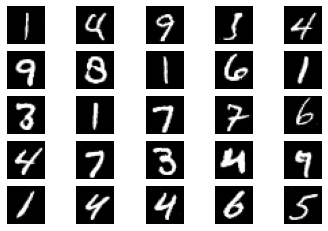

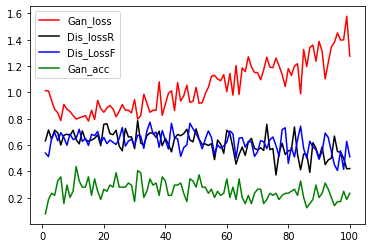

In [ ]:
train()

Para mostrar los resultados se genera un ruido aleatorio y se visualiza el comportamiento del modelo ya entrenado. 

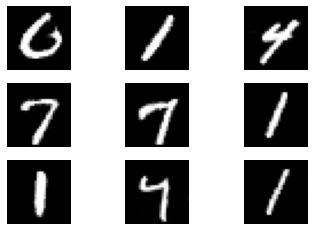

In [ ]:
noise = tf.random.normal([9, 100])   
gen_imgs=g_model.predict(noise)
gen_imgs = gen_imgs*0.5+0.5
fig, axs = plt.subplots(3, 3)
cnt = 0
for i in range(3):
    for j in range(3):
        axs[i,j].imshow(gen_imgs[cnt, :,:,0],cmap='gray')
        axs[i,j].axis('off')
        cnt += 1
plt.show()

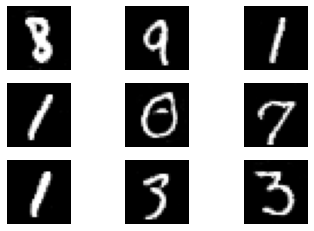

In [ ]:
noise = tf.random.normal([9, 100])   
gen_imgs=g_model.predict(noise)
gen_imgs = gen_imgs*0.5+0.5
fig, axs = plt.subplots(3, 3)
cnt = 0
for i in range(3):
    for j in range(3):
        axs[i,j].imshow(gen_imgs[cnt, :,:,0],cmap='gray')
        axs[i,j].axis('off')
        cnt += 1
plt.show()

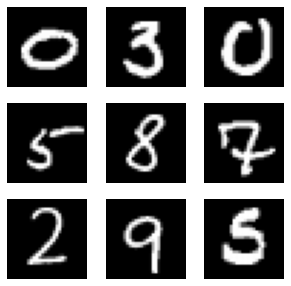

In [ ]:
ima= X[randint(0, X.shape[0],9)]
fig = plt.figure(figsize=(5,5))
for i in range(ima.shape[0]):
    plt.subplot(3, 3, i+1)
    plt.imshow(ima[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
    plt.axis('off')
#plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
plt.show()

## CIFAR-10
El conjunto de datos CIFAR-10 consta de de 60.000 imagenes en color de 32x32x3 correspondientes a 10 clases, cuenta 6.000 imagens por cada clase. Este conjunto de datos cuenta con 50.000 imagenes dedicadas a entrenamiento y 1.000 a evaluación. 

El modelo realizada en esta sección es similar al utilizado en la base de datos MNIST, con la excepción de que la entrada del discriminador pasa del tamaño 28x28x1 al tamaño 32x32x3 y la salida del generador cambia al tamaño 32x32x3, asi mismo, la complejidad de las redes ha aumentado debido a la mayor variabilidad de la base de datos en comparación con la anterior.

In [ ]:
(train, y), (_, _) = tf.keras.datasets.cifar10.load_data()
ix=list(np.where(y==7)[0])#list(np.where(y==3)[0])+list(np.where(y==7)[0])+list(np.where(y==2)[0])
X=train.astype('float32')
X=(X-127.5)/127.5
dataset=X[ix]
noise_dim=100
in_shape=(32,32,3)
Num_Example=25
seed=tf.random.normal([Num_Example, noise_dim]) 
n_epochs=350
n_batch=64

170500096/170498071 [==============================] - 4s 0us/step


In [ ]:
def define_generator():
	model = Sequential()
	n_nodes = 512 * 4 * 4
	model.add(Dense(n_nodes, input_dim=noise_dim))
	model.add(LeakyReLU(alpha=0.2))
	model.add(Reshape((4, 4, 512)))
	model.add(Conv2DTranspose(256, (7,7), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	model.add(Conv2DTranspose(256, (7,7), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	model.add(Conv2DTranspose(256, (7,7), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	#model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
	#model.add(LeakyReLU(alpha=0.2))
	model.add(Conv2D(3, (4,4), activation='tanh', padding='same'))
	return model
g_model=define_generator()
g_model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_51 (Dense)             (None, 8192)              827392    
_________________________________________________________________
leaky_re_lu_122 (LeakyReLU)  (None, 8192)              0         
_________________________________________________________________
reshape_36 (Reshape)         (None, 4, 4, 512)         0         
_________________________________________________________________
conv2d_transpose_49 (Conv2DT (None, 8, 8, 256)         6422784   
_________________________________________________________________
leaky_re_lu_123 (LeakyReLU)  (None, 8, 8, 256)         0         
_________________________________________________________________
conv2d_transpose_50 (Conv2DT (None, 16, 16, 256)       3211520   
_________________________________________________________________
leaky_re_lu_124 (LeakyReLU)  (None, 16, 16, 256)     

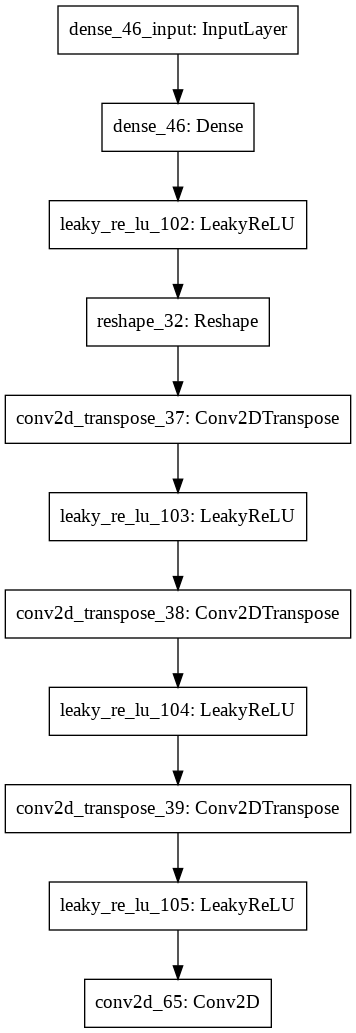

In [ ]:
tf.keras.utils.plot_model(g_model)

In [ ]:
def define_discriminator():
	model = Sequential()
	model.add(Conv2D(128, (4,4),strides=(2,2), padding='same', input_shape=in_shape))
	model.add(LeakyReLU(alpha=0.2))
	model.add(Conv2D(256, (4,4), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	#model.add(Conv2D(128, (4,4), strides=(2,2), padding='same'))
	#model.add(LeakyReLU(alpha=0.2))
	model.add(Conv2D(256, (4,4), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	model.add(Conv2D(512, (4,4), strides=(1,1), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	model.add(Flatten())
	model.add(Dropout(0.5))
	model.add(Dense(1, activation='sigmoid'))
	opt = Adam(lr=0.0002, beta_1=0.5)
	model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
	return model
d_model=define_discriminator()
d_model.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_74 (Conv2D)           (None, 16, 16, 128)       6272      
_________________________________________________________________
leaky_re_lu_126 (LeakyReLU)  (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_75 (Conv2D)           (None, 8, 8, 256)         524544    
_________________________________________________________________
leaky_re_lu_127 (LeakyReLU)  (None, 8, 8, 256)         0         
_________________________________________________________________
conv2d_76 (Conv2D)           (None, 4, 4, 256)         1048832   
_________________________________________________________________
leaky_re_lu_128 (LeakyReLU)  (None, 4, 4, 256)         0         
_________________________________________________________________
conv2d_77 (Conv2D)           (None, 4, 4, 512)       

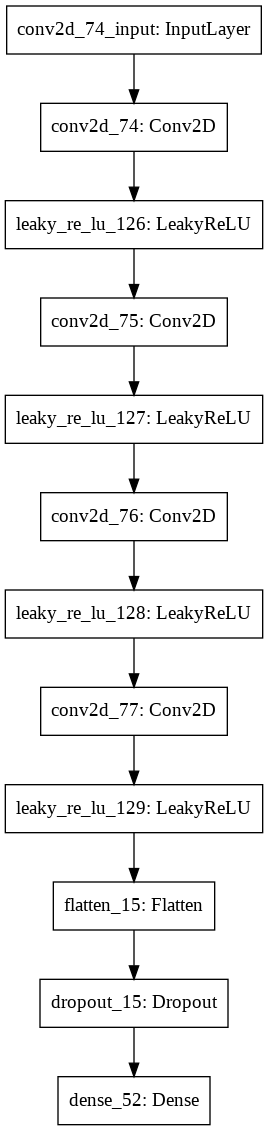

In [ ]:
tf.keras.utils.plot_model(d_model)

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_21 (Sequential)   (None, 32, 32, 3)         13685507  
_________________________________________________________________
sequential_22 (Sequential)   (None, 1)                 3685505   
Total params: 17,371,012
Trainable params: 13,685,507
Non-trainable params: 3,685,505
_________________________________________________________________


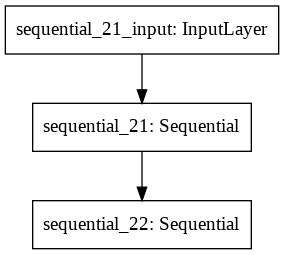

In [ ]:
def define_gan():
	d_model.trainable = False
	model = Sequential()
	model.add(g_model)
	model.add(d_model)
	opt = Adam(lr=0.0002, beta_1=0.5)
	model.compile(loss='binary_crossentropy', optimizer=opt,metrics=['accuracy'])
	return model
gan_model=define_gan()
gan_model.summary()
tf.keras.utils.plot_model(gan_model)

In [ ]:
def train():
    bat_per_epo = int(dataset.shape[0] / n_batch)
    half_batch = int(n_batch / 2)
    Loss_R=[]
    Loss_F=[]
    Acc=[]
    gen_lossA=[]  
    for C in range(n_epochs): 
        start=time.time()
        for D in range(bat_per_epo):
            X_real, y_real = generate_real_samples(dataset, half_batch)
            d_loss1, _ = d_model.train_on_batch(X_real, y_real)
            X_fake, y_fake = generate_fake_samples(g_model, noise_dim, half_batch)
            d_loss2, _ = d_model.train_on_batch(X_fake, y_fake)
            X_gan = generate_latent_points(noise_dim, n_batch)
            y_gan = ones((n_batch, 1))
            g_loss,acc = gan_model.train_on_batch(X_gan, y_gan)
        display.clear_output(wait=True)
        print ('Epoca {}/{} tiempo total:{}'.format(C + 1,n_epochs, time.time()-start))  
        gen_imgs=g_model.predict(seed)
        gen_imgs = gen_imgs*0.5+0.5
        fig, axs = plt.subplots(5, 5)
        cnt = 0
        for i in range(5):
            for j in range(5):
                axs[i,j].imshow(gen_imgs[cnt, :,:,:])
                axs[i,j].axis('off')
                cnt += 1
        plt.show()
        gen_lossA.append(g_loss)
        Loss_R.append(d_loss1)
        Loss_F.append(d_loss2)
        Acc.append(acc)
        plt.plot(np.array(range(1,np.array(gen_lossA).shape[0]+1)),gen_lossA,'r',np.array(range(1,np.array(Loss_R).shape[0]+1)),Loss_R,'k',
                 np.array(range(1,np.array(Loss_F).shape[0]+1)),Loss_F,'b',np.array(range(1,np.array(Acc).shape[0]+1)),Acc,'g')
        plt.legend(['Gan_loss','Dis_lossR','Dis_LossF','Gan_acc'])
        plt.show()

Epoca 350/350 tiempo total:19.534736156463623


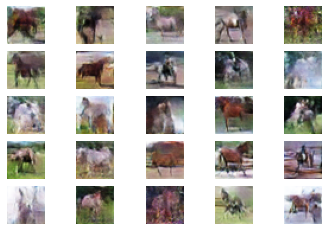

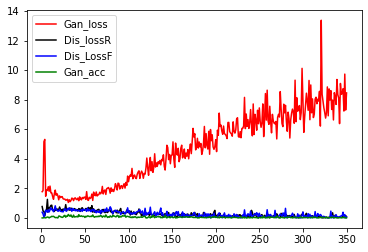

In [ ]:
train()

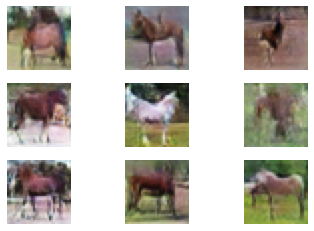

In [ ]:
noise = tf.random.normal([9, 100])   
gen_imgs=g_model.predict(noise)
gen_imgs = gen_imgs*0.5+0.5
fig, axs = plt.subplots(3, 3)
cnt = 0
for i in range(3):
    for j in range(3):
        axs[i,j].imshow(gen_imgs[cnt, :,:,:])
        axs[i,j].axis('off')
        cnt += 1
plt.show()

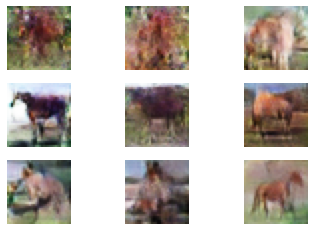

In [ ]:
noise = tf.random.normal([9, 100])   
gen_imgs=g_model.predict(noise)
gen_imgs = gen_imgs*0.5+0.5
fig, axs = plt.subplots(3, 3)
cnt = 0
for i in range(3):
    for j in range(3):
        axs[i,j].imshow(gen_imgs[cnt, :,:,:])
        axs[i,j].axis('off')
        cnt += 1
plt.show()

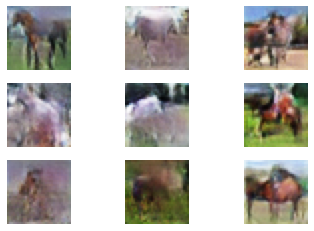

In [ ]:
noise = tf.random.normal([9, 100])   
gen_imgs=g_model.predict(noise)
gen_imgs = gen_imgs*0.5+0.5
fig, axs = plt.subplots(3, 3)
cnt = 0
for i in range(3):
    for j in range(3):
        axs[i,j].imshow(gen_imgs[cnt, :,:,:])
        axs[i,j].axis('off')
        cnt += 1
plt.show()      

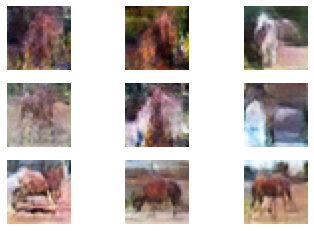

In [ ]:
noise = tf.random.normal([9, 100])   
gen_imgs=g_model.predict(noise)
gen_imgs = gen_imgs*0.5+0.5
fig, axs = plt.subplots(3, 3)
cnt = 0
for i in range(3):
    for j in range(3):
        axs[i,j].imshow(gen_imgs[cnt, :,:,:])
        axs[i,j].axis('off')
        cnt += 1
plt.show()

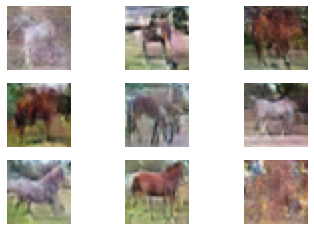

In [ ]:
noise = tf.random.normal([9, 100])   
gen_imgs=g_model.predict(noise)
gen_imgs = gen_imgs*0.5+0.5
fig, axs = plt.subplots(3, 3)
cnt = 0
for i in range(3):
    for j in range(3):
        axs[i,j].imshow(gen_imgs[cnt, :,:,:])
        axs[i,j].axis('off')
        cnt += 1
plt.show()

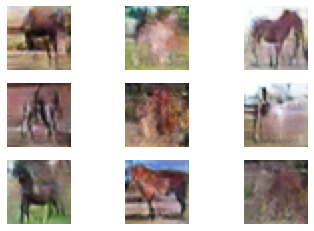

In [ ]:
noise = tf.random.normal([9, 100])   
gen_imgs=g_model.predict(noise)
gen_imgs = gen_imgs*0.5+0.5
fig, axs = plt.subplots(3, 3)
cnt = 0
for i in range(3):
    for j in range(3):
        axs[i,j].imshow(gen_imgs[cnt, :,:,:])
        axs[i,j].axis('off')
        cnt += 1
plt.show()

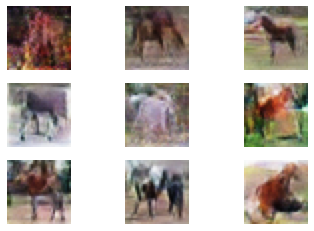

In [ ]:
noise = tf.random.normal([9, 100])   
gen_imgs=g_model.predict(noise)
gen_imgs = gen_imgs*0.5+0.5
fig, axs = plt.subplots(3, 3)
cnt = 0
for i in range(3):
    for j in range(3):
        axs[i,j].imshow(gen_imgs[cnt, :,:,:])
        axs[i,j].axis('off')
        cnt += 1
plt.show()

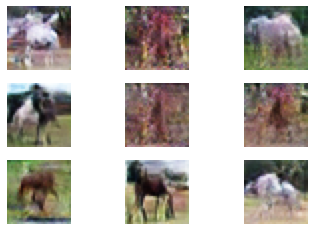

In [ ]:
noise = tf.random.normal([9, 100])   
gen_imgs=g_model.predict(noise)
gen_imgs = gen_imgs*0.5+0.5
fig, axs = plt.subplots(3, 3)
cnt = 0
for i in range(3):
    for j in range(3):
        axs[i,j].imshow(gen_imgs[cnt, :,:,:])
        axs[i,j].axis('off')
        cnt += 1
plt.show()

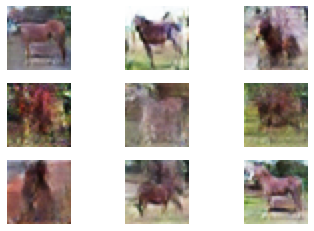

In [ ]:
noise = tf.random.normal([9, 100])   
gen_imgs=g_model.predict(noise)
gen_imgs = gen_imgs*0.5+0.5
fig, axs = plt.subplots(3, 3)
cnt = 0
for i in range(3):
    for j in range(3):
        axs[i,j].imshow(gen_imgs[cnt, :,:,:])
        axs[i,j].axis('off')
        cnt += 1
plt.show()

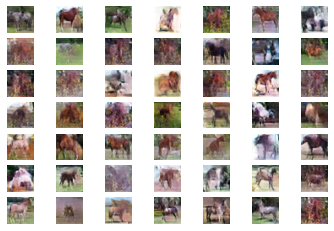

In [ ]:
noise = tf.random.normal([49, 100])   
gen_imgs=g_model.predict(noise)
gen_imgs = gen_imgs*0.5+0.5
fig, axs = plt.subplots(7, 7)
cnt = 0
for i in range(7):
    for j in range(7):
        axs[i,j].imshow(gen_imgs[cnt, :,:,:])
        axs[i,j].axis('off')
        cnt += 1
plt.show()

# Conditional GAN
En la sección anterior se pudo observar el funcionamiento de una GAN sobre dos bases de datos, el principal problema de la anterior implementación es que la generación de los datos es de forma aleatoria. Por ejemplo, en las 25 imagenes de la base MNIST podrían ser todas de un mismo número o nunca aparecer uno de los 10 dígitos presentes en la base de datos, es decir, no tenemos control sobre la creaación de los nuevos datos.


Con el fin de solventar este problema se recurre a utilizar una variante de las GANs. Las Conditional GANs(CGAN) son identicas a las GANs con la diferencia de que reciben la etiqueta de los datos o lotes de datos en cada red. Esto produce que los datos no se generen de forma aleatoria,nos permita controlar y guiar la salida para que genere un número determinado de datos correspondientes a cada clase. En consecuencia el discriminador duplica su trabajo debido a que ahora debe recibir la imagen,su etiqueta y clasificar los datos como reales o falsos.

La estructura de la CGAN es:


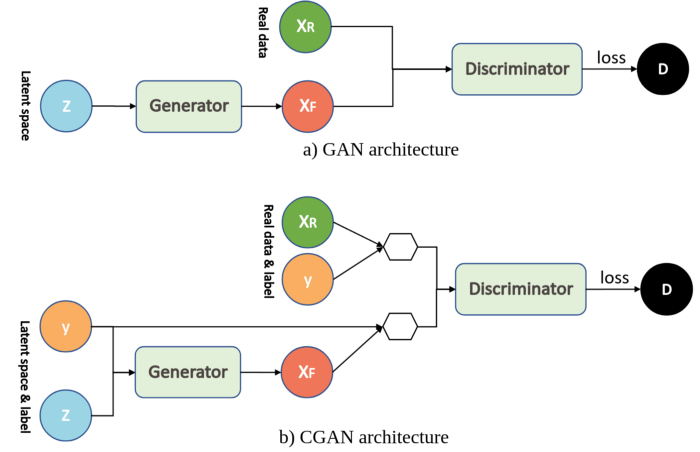

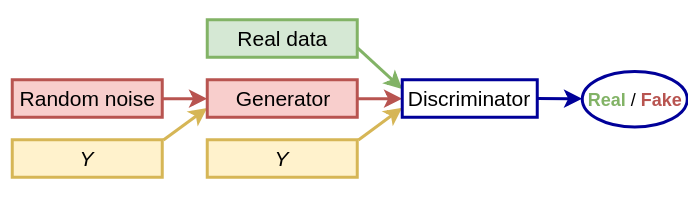
## Función de costo
\begin{equation}
 _{G}^{Min}\rightleftharpoons_{D}^{Max}= E_{x\sim PData(x)}log(D(x|y))+E_{z\sim P_{z}(z)}log(1-D(G(z|y))) 
\end{equation}
Siendo `y` la etiqueta de los datos.

## Implemntación
Como se observará a continuación la gran diferencia presente en este modelo es la adición de la etiqueta en cada una de las redes.

In [ ]:
(train, trainy), (vx, vy) = tf.keras.datasets.mnist.load_data()
train = train.reshape(train.shape[0], 28, 28, 1)
X=train.astype('float32')
X=(X-127.5)/127.5
dataset=[X,trainy]
noise_dim=100
in_shape=(28,28,1)
Num_Example=10
seed=tf.random.normal([Num_Example, noise_dim]) 
n_epochs=40
num_classes = np.unique(trainy).shape[0]
n_batch=64

11493376/11490434 [==============================] - 0s 0us/step


Las funciones `generate_real_samples`,`generate_latent_points` y`generate_fake_samples` se modifican para que ahora sean capaces de entregar adicionalmente las etiquetas de los datos reales y de los datos generados.

In [ ]:
def generate_real_samples(dataset, n_samples):
	images, labels = dataset
	ix = randint(0, images.shape[0], n_samples)
	X, labels = images[ix], labels[ix]
	y = ones((n_samples, 1))
	return [X, labels], y
 
def generate_latent_points(latent_dim, n_samples, labels, n_classes=10):
	x_input = randn(latent_dim * n_samples)
	z_input = x_input.reshape(n_samples, latent_dim)
	return [z_input, labels]
 
def generate_fake_samples(generator, latent_dim, n_samples,labels):
	z_input, labels_input = generate_latent_points(latent_dim, n_samples,labels)
	images = generator.predict([labels_input,z_input])
	y = zeros((n_samples, 1))
	return [images, labels_input], y

### Diseño del modelo
Como se puede observar las redes del generador, discriminador y GAN ahora poseen una nueva entrada llamada `label` la cual posee la etiqueta de los datos. Esta variable es concatenada con el ruido para el caso del generador y con una imagen en el caso del discriminador. las redes en los tres casos despues de la concatenación es la misma que se utilizó en el apartado de las GAN. 

In [ ]:
def define_generator():               
    label = Input(shape = (1, ))
    embed_gen = Embedding(10, 50)(label)
    dense_layer_gen = Dense(7*7*256)(embed_gen)
    reshaped_dense_gen = Reshape((7, 7, 256))(dense_layer_gen)
    noise = Input(shape = (noise_dim,))
    dense1 = Dense(7*7*256)(noise)
    reshaped_dense_gen1=Reshape((7, 7, 256))(dense1)
    concat_layer_gen = Concatenate()([reshaped_dense_gen, reshaped_dense_gen1])
    L1=LeakyReLU(alpha=0.2)(concat_layer_gen)
    C1=Conv2DTranspose(256, (4,4), strides=(2,2), padding='same')(L1)
    L2=LeakyReLU(alpha=0.2)(C1)
    C3=Conv2DTranspose(256, (4,4), strides=(2,2), padding='same')(L2)
    L3=LeakyReLU(alpha=0.2)(C3)
    C4=Conv2D(1, (7,7), activation='tanh', padding='same')(L3)
    model=Model([label, noise], C4)
    return model

In [ ]:
g_model=define_generator()
g_model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 1, 50)        500         input_1[0][0]                    
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 100)]        0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 1, 12544)     639744      embedding[0][0]                  
_______________________________________________________________________________________

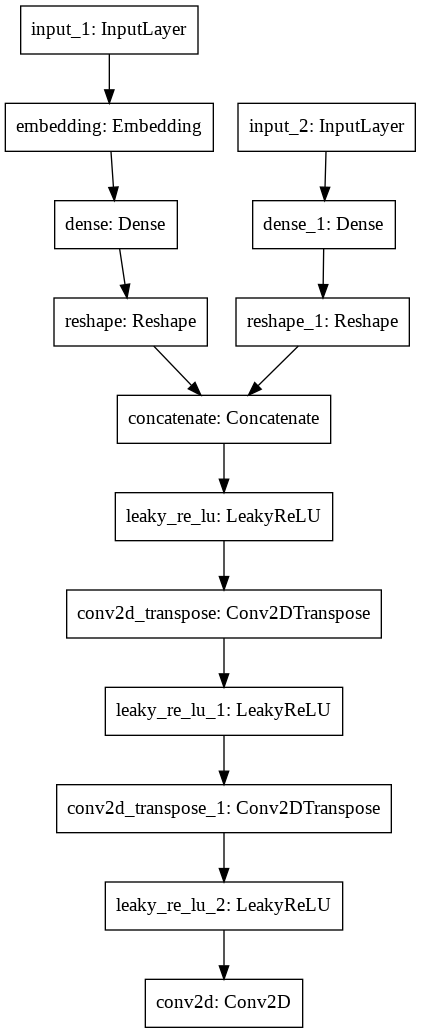

In [ ]:
tf.keras.utils.plot_model(g_model)

In [ ]:
def define_discriminator():        
    label = Input(shape = (1, ))
    embed = Embedding(10, 50)(label)
    dense_layer = Dense(28*28*1)(embed)
    reshaped_dense = Reshape((28,28,1))(dense_layer)
    input_disc = Input(shape = (28, 28, 1))   
    concat_layer = Concatenate()([input_disc, reshaped_dense])
    C1=Conv2D(64, (4,4),strides=(2,2), padding='same', input_shape=in_shape)(concat_layer)
    L1=LeakyReLU(alpha=0.2)(C1)
    C2=Conv2D(256, (4,4), strides=(2,2), padding='same')(L1)
    L2=LeakyReLU(alpha=0.2)(C2)
    C3=Conv2D(512, (4,4), strides=(2,2), padding='same')(L2)
    L3=LeakyReLU(alpha=0.2)(C3)
    F=Flatten()(L3)
    D=Dropout(0.4)(F)
    D1=Dense(1, activation='sigmoid')(D)
    model=Model([label,input_disc],D1)
    opt = Adam(lr=0.0002, beta_1=0.5)
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model

In [ ]:
d_model=define_discriminator()
d_model.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 1, 50)        500         input_3[0][0]                    
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 1, 784)       39984       embedding_1[0][0]                
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 28, 28, 1)]  0                                            
_______________________________________________________________________________________

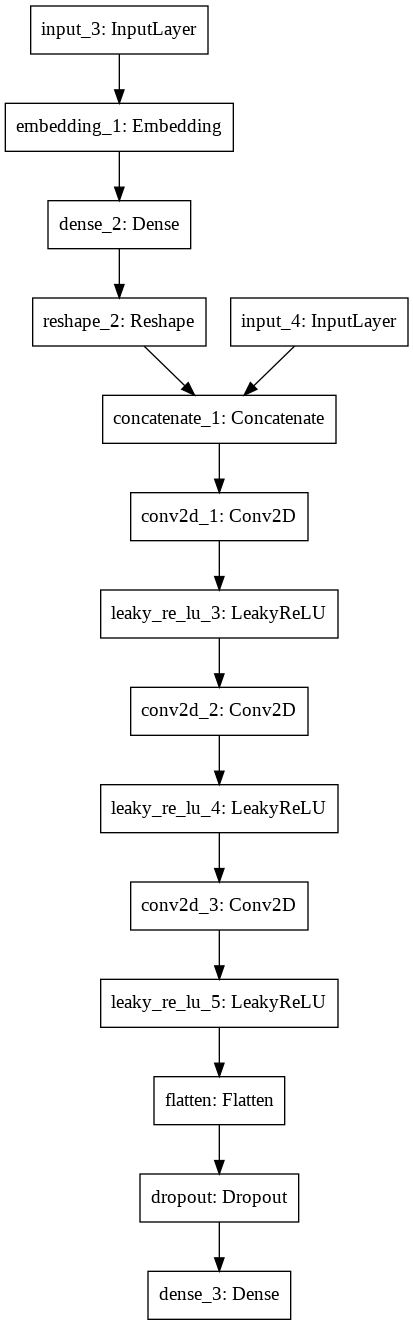

In [ ]:
tf.keras.utils.plot_model(d_model)

In [ ]:
def define_gan():
    inputs = Input(shape = (noise_dim,)) 
    label = Input(shape = (1,))
    gen_img = g_model([label, inputs])
    d_model.trainable = False
    outs = d_model([label, gen_img])
    comb_model = Model([label, inputs], outs)
    comb_model.compile(loss='binary_crossentropy', optimizer= Adam(0.0002, 0.5), metrics=['accuracy'])
    return comb_model

Model: "functional_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_5 (InputLayer)            [(None, 100)]        0                                            
__________________________________________________________________________________________________
functional_1 (Functional)       (None, 28, 28, 1)    5065973     input_6[0][0]                    
                                                                 input_5[0][0]                    
__________________________________________________________________________________________________
functional_3 (Functional)       (None, 1)            2410853     input_6[0][0]         

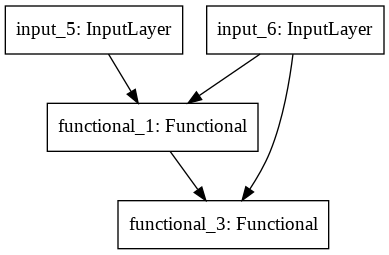

In [ ]:
gan_model=define_gan()
gan_model.summary()
tf.keras.utils.plot_model(gan_model)

En consecuencia al cambio en la estructura de la redes y de las funciones que nos ayudan en el entrenamiento es necesario realizar algunos cambios en la función `train`, quedando de la siguiente manera:

In [ ]:
def train():
    bat_per_epo = int(dataset[0].shape[0] / n_batch)
    half_batch = int(n_batch / 2)
    Loss_R=[]
    Loss_F=[]
    Acc=[]
    gen_lossA=[]  
    for C in range(n_epochs): 
        start=time.time()
        for D in range(bat_per_epo):
            [X_real, labels_real], y_real = generate_real_samples(dataset, half_batch)
            d_loss1, _ = d_model.train_on_batch([labels_real,X_real], y_real)
            [X_fake, labels], y_fake = generate_fake_samples(g_model,noise_dim , half_batch)
            d_loss2, _ = d_model.train_on_batch([labels,X_fake], y_fake)
            [z_input, labels_input] = generate_latent_points(noise_dim , n_batch)
            y_gan = ones((n_batch, 1))
            g_loss,acc = gan_model.train_on_batch([labels_input,z_input], y_gan)
        display.clear_output(wait=True)
        print ('Epoca {}/{} tiempo total:{}'.format(C + 1,n_epochs, time.time()-start))
        gen_imgs=[]
        for r in range(num_classes):  
            gen_imgs.append(g_model.predict([np.array([r]*Num_Example),seed]))
        gen_imgs=np.array(gen_imgs).reshape(num_classes*Num_Example,28,28,1)
        gen_imgs = gen_imgs*0.5+0.5
        fig, axs = plt.subplots(num_classes, Num_Example)
        cnt = 0
        for i in range(num_classes):
            for j in range(Num_Example):
                axs[i,j].imshow(gen_imgs[cnt, :,:,0], cmap='gray')
                axs[i,j].axis('off')
                cnt += 1
        plt.show()
        gen_lossA.append(g_loss)
        Loss_R.append(d_loss1)
        Loss_F.append(d_loss2)
        Acc.append(acc)
        plt.plot(np.array(range(1,np.array(gen_lossA).shape[0]+1)),gen_lossA,'r',np.array(range(1,np.array(Loss_R).shape[0]+1)),Loss_R,'k',
                 np.array(range(1,np.array(Loss_F).shape[0]+1)),Loss_F,'b',np.array(range(1,np.array(Acc).shape[0]+1)),Acc,'g')
        plt.legend(['Gan_loss','Dis_lossR','Dis_LossF','Gan_acc'])
        plt.ylim([0,3])
        plt.show()

Epoca 50/50 tiempo total:109.21141409873962


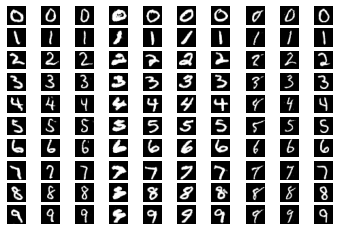

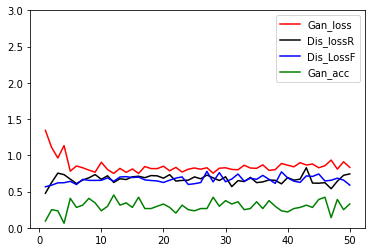

In [ ]:
train()

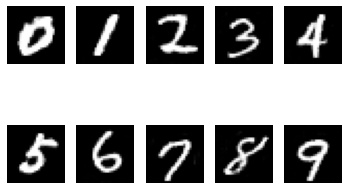

In [ ]:
noise = tf.random.normal([num_classes, 100])   
gen_imgs=g_model.predict([np.array([0,1,2,3,4,5,6,7,8,9]),noise])
gen_imgs = gen_imgs*0.5+0.5
fig, axs = plt.subplots(2, 5)
cnt = 0
for i in range(2):
    for j in range(5):
        axs[i,j].imshow(gen_imgs[cnt, :,:,0], cmap='gray')
        axs[i,j].axis('off')
        cnt += 1
plt.show()

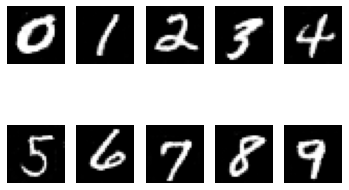

In [ ]:
noise = tf.random.normal([num_classes, 100])   
gen_imgs=g_model.predict([np.array([0,1,2,3,4,5,6,7,8,9]),noise])
gen_imgs = gen_imgs*0.5+0.5
fig, axs = plt.subplots(2, 5)
cnt = 0
for i in range(2):
    for j in range(5):
        axs[i,j].imshow(gen_imgs[cnt, :,:,0], cmap='gray')
        axs[i,j].axis('off')
        cnt += 1
plt.show()

# ClustrGAN

En las secciones anteriores se implementaron dos modelos de manera ilustrativa para comprender el funcionaminto de las redes adversas. El primer modelo creado pertenece a la categoria de aprendizaje no supervizado(GAN) y el segundo al aprendizaje supervizado(CGAN) ambos modelos mapean del esapcio latente al esapcio de los datos para generar muestras de alta fidelidad. Si bien se utiliza el espacio latente las redes adversas no están diseñadas para el agrupamiento.

Como el objetivo principal de este documento es realizar la detección de objetos sobre imagenes y video utilizando redes adversas debemos modificar las arquitecturas ya miradas anteriormente para utilizar el espacio latente como medio de agrupamiento. 

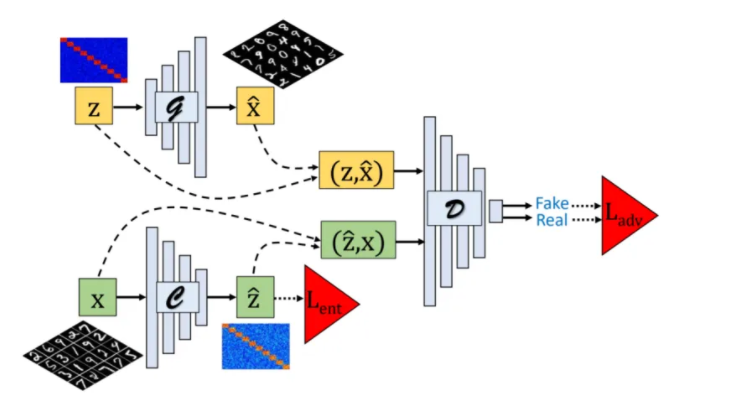

Como se puede observar en la figura la arquitectura de la clusterGAN es similar al primer modelo implementado en este documento con dos cambios importantes. El primero es que el discriminador ahora recibe los datos reales y los generados en conjunto con sus representaciones en el espacio latente, el segundo cambio importante es que adiciona una red encargada de codificar los datos reales, esta red es la encargada del agrupamiento de los datos(Red de agrupamiento). 

##Implementación



In [22]:
(train, trainy), (vx, vy) = tf.keras.datasets.mnist.load_data()
train = train.reshape(train.shape[0], 28, 28, 1)
X=train.astype('float32')
X=(X-127.5)/127.5
dataset=[X,trainy]
noise_dim=100
in_shape=(28,28,1)
Num_Example=10
seed=tf.random.normal([Num_Example, noise_dim]) 
n_epochs=40
num_classes = np.unique(trainy).shape[0]
n_batch=64

### Generador


In [23]:
def define_generator():
	model = Sequential()
	n_nodes = 512 * 7 * 7
	model.add(Dense(n_nodes, input_dim=noise_dim))
	model.add(LeakyReLU(alpha=0.2))
	model.add(Reshape((7, 7, 512)))
	model.add(Conv2DTranspose(256, (4,4), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	model.add(Conv2DTranspose(256, (4,4), strides=(2,2), padding='same'))
	model.add(LeakyReLU(alpha=0.2))
	model.add(Conv2D(1, (7,7), activation='tanh', padding='same'))
	return model
g_model=define_generator()
g_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 25088)             2533888   
_________________________________________________________________
leaky_re_lu_18 (LeakyReLU)   (None, 25088)             0         
_________________________________________________________________
reshape_6 (Reshape)          (None, 7, 7, 512)         0         
_________________________________________________________________
conv2d_transpose_4 (Conv2DTr (None, 14, 14, 256)       2097408   
_________________________________________________________________
leaky_re_lu_19 (LeakyReLU)   (None, 14, 14, 256)       0         
_________________________________________________________________
conv2d_transpose_5 (Conv2DTr (None, 28, 28, 256)       1048832   
_________________________________________________________________
leaky_re_lu_20 (LeakyReLU)   (None, 28, 28, 256)      

In [24]:
def define_discriminator():        
    label = Input(shape = (noise_dim, ))
    #embed = Embedding(10, 50)(label)
    dense_layer = Dense(16)(label)
    reshaped_dense = Reshape((14,14,4))(dense_layer)
    input_disc = Input(shape = (28, 28, 1))   
    C1=Conv2D(128, (4,4),strides=(2,2), padding='same', input_shape=in_shape)(input_disc)
    L1=LeakyReLU(alpha=0.2)(C1)
    C2=Conv2D(256, (4,4), strides=(2,2), padding='same')(L1)
    L2=LeakyReLU(alpha=0.2)(C2)
    C3=Conv2D(512, (4,4), strides=(2,2), padding='same')(L2)
    L3=LeakyReLU(alpha=0.2)(C3)
    F=Flatten()(L3)
    concat_layer = Concatenate()([F,dense_layer])
    D=Dropout(0.4)(concat_layer)
    D1=Dense(1, activation='sigmoid')(D)
    model=Model([label,input_disc],D1)
    opt = Adam(lr=0.0002, beta_1=0.5)
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model
d_model=define_discriminator()
d_model.summary()

ValueError: ignored

In [25]:
def Z_Latente():
	model = Sequential()
	model.add(Conv2D(1, (5,5),strides=(1,1), padding='same', input_shape=in_shape))
	#model.add(Conv2D(128, (4,4), strides=(2,2), padding='same'))
	#model.add(Conv2D(64, (4,4), strides=(2,2), padding='same'))
	model.add(Flatten())
	#model.add(Dropout(0.4))
	model.add(Dense(512))
	model.add(Dense(256))
	model.add(Dense(128))
	model.add(Dense(64))
	model.add(Dense(noise_dim))
	return model
z_model=Z_Latente()
z_model.summary()


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 28, 28, 1)         26        
_________________________________________________________________
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_22 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_23 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_24 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_25 (Dense)             (None, 100)              

Model: "functional_15"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_14 (InputLayer)           [(None, 100)]        0                                            
__________________________________________________________________________________________________
sequential_4 (Sequential)       (None, 28, 28, 1)    5692673     input_14[0][0]                   
__________________________________________________________________________________________________
functional_9 (Functional)       (None, 1)            2712545     input_14[0][0]                   
                                                                 sequential_4[0][0]               
Total params: 8,405,218
Trainable params: 5,692,673
Non-trainable params: 2,712,545
__________________________________________________________________________________________________


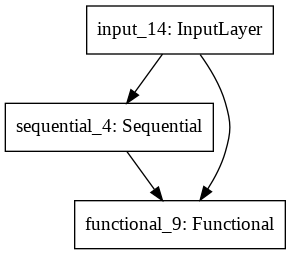

In [26]:
def define_gan():
    inputs = Input(shape = (noise_dim,)) 
    gen_img = g_model(inputs)
    d_model.trainable = False
    outs = d_model([inputs, gen_img])
    comb_model = Model( inputs, outs)
    comb_model.compile(loss='binary_crossentropy', optimizer= Adam(0.0002, 0.5), metrics=['accuracy'])
    return comb_model
gan_model=define_gan()
gan_model.summary()
tf.keras.utils.plot_model(gan_model)

Model: "functional_17"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_15 (InputLayer)           [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
sequential_5 (Sequential)       (None, 100)          580926      input_15[0][0]                   
__________________________________________________________________________________________________
functional_9 (Functional)       (None, 1)            2712545     sequential_5[0][0]               
                                                                 input_15[0][0]                   
Total params: 3,293,471
Trainable params: 580,926
Non-trainable params: 2,712,545
__________________________________________________________________________________________________


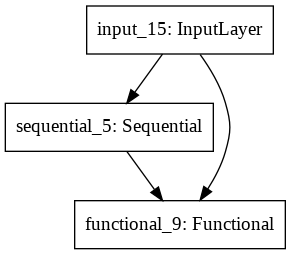

In [27]:
def define_cluster():
    label = Input(shape =in_shape )
    noise= z_model(label)
    d_model.trainable = False
    outs = d_model([noise, label])
    comb_model = Model(label, outs)
    comb_model.compile(loss='binary_crossentropy', optimizer= Adam(0.0002, 0.5), metrics=['accuracy'])
    return comb_model
cluster_model=define_cluster()
cluster_model.summary()
tf.keras.utils.plot_model(cluster_model)

In [28]:
def generate_real_samples(dataset, n_samples,z_model):
    images, labels = dataset
    ix = randint(0, images.shape[0], n_samples)
    X, labels = images[ix], labels[ix]
    z_real=z_model.predict(X)
    y = ones((n_samples, 1))
    return [X, z_real], y
 
def generate_latent_points(latent_dim, n_samples, n_classes=10):
    x_input = randn(latent_dim * n_samples)
    z_input = x_input.reshape(n_samples, latent_dim)
    return z_input
 
def generate_fake_samples(generator, latent_dim, n_samples):
    z_input = generate_latent_points(latent_dim, n_samples)
    images = generator.predict(z_input)
    y = zeros((n_samples, 1))
    return [images, z_input], y

In [29]:
def train():
    bat_per_epo = int(dataset[0].shape[0] / n_batch)
    half_batch = int(n_batch / 2)
    Loss_R=[]
    Loss_F=[]
    Acc=[]
    Zgan=[]
    Zacc=[]
    gen_lossA=[]  
    for C in range(n_epochs): 
        start=time.time()
        for D in range(bat_per_epo):
            [X_real, z_real], y_real = generate_real_samples(dataset, half_batch,z_model)
            d_loss1, _ = d_model.train_on_batch([z_real,X_real], y_real)
            [X_fake, z_fake], y_fake = generate_fake_samples(g_model,noise_dim , half_batch)
            d_loss2, _ = d_model.train_on_batch([z_fake,X_fake], y_fake)
            z_input = generate_latent_points(noise_dim , n_batch)
            y_gan = ones((n_batch, 1))
            g_loss,acc = gan_model.train_on_batch(z_input, y_gan)
            X=dataset[0][randint(0, dataset[0].shape[0], n_batch)]
            #z_loss,z_acc = cluster_model.train_on_batch(X, y_gan)
        display.clear_output(wait=True)
        print ('Epoca {}/{} tiempo total:{}'.format(C + 1,n_epochs, time.time()-start))
        gen_imgs=[]
        for r in range(num_classes):  
            gen_imgs.append(g_model.predict(seed))
        gen_imgs=np.array(gen_imgs).reshape(num_classes*Num_Example,28,28,1)
        gen_imgs = gen_imgs*0.5+0.5
        fig, axs = plt.subplots(num_classes, Num_Example)
        cnt = 0
        for i in range(num_classes):
            for j in range(Num_Example):
                axs[i,j].imshow(gen_imgs[cnt, :,:,0], cmap='gray')
                axs[i,j].axis('off')
                cnt += 1
        plt.show()
        gen_lossA.append(g_loss)
        Loss_R.append(d_loss1)
        Loss_F.append(d_loss2)
        Acc.append(acc)
        #Zgan.append(z_loss)
        #Zacc.append(z_acc)
        plt.plot(np.array(range(1,np.array(gen_lossA).shape[0]+1)),gen_lossA,'r',np.array(range(1,np.array(Loss_R).shape[0]+1)),Loss_R,'k',
                 np.array(range(1,np.array(Loss_F).shape[0]+1)),Loss_F,'b',np.array(range(1,np.array(Acc).shape[0]+1)),Acc,'g')
        plt.legend(['Gan_loss','Dis_lossR','Dis_LossF','Gan_acc'])
        plt.ylim([0,3])
        plt.show()
        #plt.plot(np.array(range(1,np.array(Zgan).shape[0]+1)),Zgan,'r',np.array(range(1,np.array(Zacc).shape[0]+1)),Zacc,'g')
        #plt.legend(['cluster_Gan','cluster_Acc'])
        #plt.ylim([0,3])
        #plt.show()

Epoca 3/40 tiempo total:129.78395795822144


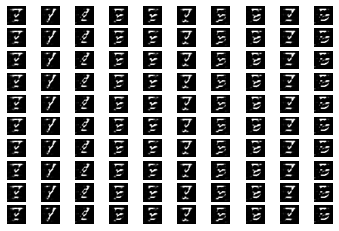

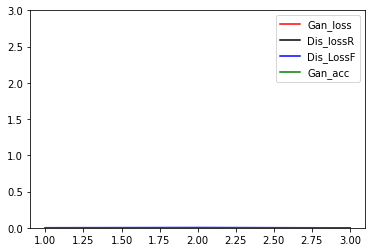

KeyboardInterrupt: ignored

In [30]:
train()

In [ ]:
 Xv=vx.astype('float32')
Xv=(Xv-127.5)/127.5
Xv= Xv.reshape(Xv.shape[0], 28, 28, 1)
vy_e=z_model.predict(Xv)
vy_e=vy_e.argmax(1)
(vy==vy_e).sum()/vy.shape[0]

0.114

In [ ]:
vy_e[0]



```
function ClickConnect(){
console.log("Working"); 
document
  .querySelector('#top-toolbar > colab-connect-button')
  .shadowRoot.querySelector('#connect')
  .click() 
}
setInterval(ClickConnect,60000)
```

